Testfil

In [10]:
import csv
import os

#f = open("temperatur_trykk_met_samme_rune_time_datasett.csv", "r")
#f = open(r"temperatur_trykk_met_samme_rune_time_datasett.csv","r")
f = open(r"C:\Users\filip\OneDrive - Universitetet i Stavanger\1st semester\Dat120\øving\6\Dat120-ving-6-Gruppeprosjekt-del-1\temperatur_trykk_met_samme_rune_time_datasett.csv")
#f.readline()

if os.path.exists(f):
    print("File found!")

#skal gi 
#Sola;SN44560;11.06.2021 01:00;16,1;1013,7

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\filip\\OneDrive - Universitetet i Stavanger\\1st semester\\Dat120\\øving\\6\\Dat120-ving-6-Gruppeprosjekt-del-1\\temperatur_trykk_met_samme_rune_time_datasett.csv'

In [12]:
import os
print(os.getcwd())
#jamen hva faen 

#OH MY FUCK DET ER EN .CSV.TXT FIL
#HVA FAEN

#trykk_og_temperaturlogg_rune_time.csv.txt

c:\Users\filip\OneDrive - Universitetet i Stavanger\1st semester\Dat120\øving\6\Dat120-ving-6-Gruppeprosjekt-del-1


In [ ]:

rune_temp     = [] 
sola_temp     = []

sola = open("temperatur_trykk_met_samme_rune_time_datasett.csv", "r")
rune = open("trykk_og_temperaturlogg_rune_time.csv.txt", "r")
rune_reader = csv.reader(rune, delimiter=';')
sola_reader = csv.reader(sola, delimiter=';')




In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

class RuneData:
    def __init__(self, filnavn):
        self.filnavn = filnavn
        self.data = pd.DataFrame(columns=['datetime', 'trykk_bar', 'trykk_abs', 'temperatur'])
        self.LesData()

    def LesData(self):
        with open(self.filnavn) as data_rune:
            reader = csv.reader(data_rune, delimiter=';')
            rows = []
            for row in reader:
                if "Dato" not in row[0]:  # Skip header
                    # Parse the datetime column and append the relevant data
                    datetime_value = pd.to_datetime(row[0], format='%d.%m.%Y %H:%M')
                    rows.append([datetime_value, float(row[2].replace(",", ".")), float(row[3].replace(",", ".")), float(row[4].replace(",", "."))])
            self.data = pd.DataFrame(rows, columns=['datetime', 'trykk_bar', 'trykk_abs', 'temperatur'])

    def get_data(self):
        return self.data


class SolaData:
    def __init__(self, filnavn):
        self.filnavn = filnavn
        self.data = pd.DataFrame(columns=['datetime', 'trykk', 'temp'])
        self.LesData()

    def LesData(self):
        with open(self.filnavn) as data_sola:
            reader = csv.reader(data_sola, delimiter=';')
            rows = []
            for row in reader:
                if "Navn" not in row[0]:  # Skip header
                    # Parse the datetime column and append the relevant data
                    datetime_value = pd.to_datetime(row[2], format='%d.%m.%Y %H:%M')
                    rows.append([datetime_value, float(row[4].replace(",", ".")), float(row[3].replace(",", "."))])
            self.data = pd.DataFrame(rows, columns=['datetime', 'trykk', 'temp'])

    def get_data(self):
        return self.data


def interpolate_data(shorter_df, longer_df):
    """
    Interpolate the shorter dataset to match the timestamps of the longer dataset.
    """
    # Set 'datetime' as the index for interpolation
    shorter_df.set_index('datetime', inplace=True)
    longer_df.set_index('datetime', inplace=True)
    
    # Reindex the shorter dataset using the timestamps from the longer dataset
    shorter_interpolated = shorter_df.reindex(longer_df.index).interpolate(method='time')
    
    return shorter_interpolated

# Example usage:

# Load RuneData and SolaData
rune_data = RuneData('trykk_og_temperaturlogg_rune_time.csv.txt')  # Replace with the actual file path for file 2
sola_data = SolaData('temperatur_trykk_met_samme_rune_time_datasett.csv.txt')  # Replace with the actual file path for file 1

# Get data from the classes
rune_df = rune_data.get_data()
sola_df = sola_data.get_data()

# Interpolate the shorter SolaData to match RuneData's timestamps
sola_interpolated = interpolate_data(sola_df, rune_df)

# Now both datasets have the same length and aligned timestamps
print(sola_interpolated.head())

# Plotting the interpolated data against the original RuneData
plt.plot(rune_df.index, rune_df['trykk_bar'], label='Rune Pressure (Bar)')
plt.plot(sola_interpolated.index, sola_interpolated['trykk'], label='Sola Pressure (Interpolated)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()


ValueError: could not convert string to float: ''

                     trykk  temp
datetime                        
2021-11-06 14:23:00    NaN   NaN
2021-11-06 14:23:00    NaN   NaN
2021-11-06 14:23:00    NaN   NaN
2021-11-06 14:23:00    NaN   NaN
2021-11-06 14:23:00    NaN   NaN


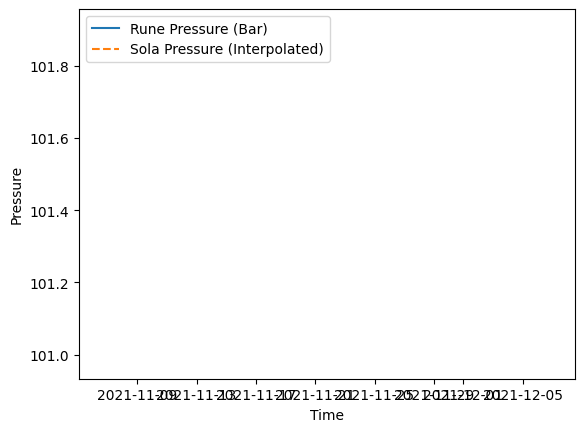

In [7]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

class RuneData:
    def __init__(self, filnavn):
        self.filnavn = filnavn
        self.data = pd.DataFrame(columns=['datetime', 'trykk_bar', 'trykk_abs', 'temperatur'])
        self.LesData()

    def LesData(self):
        with open(self.filnavn) as data_rune:
            reader = csv.reader(data_rune, delimiter=';')
            rows = []
            for row in reader:
                if "Dato" not in row[0] and "am" not in row[0] and "pm" not in row[0]:  # Skip header
                    try:
                        # Parse the datetime column
                        datetime_value = pd.to_datetime(row[0], format='%d.%m.%Y %H:%M')
                        
                        # Handle missing values by checking if each field is non-empty
                        trykk_bar = float(row[2].replace(",", ".")) if row[2] else None
                        trykk_abs = float(row[3].replace(",", ".")) if row[3] else None
                        temperatur = float(row[4].replace(",", ".")) if row[4] else None

                        rows.append([datetime_value, trykk_bar, trykk_abs, temperatur])
                    except ValueError as e:
                        # Handle row-specific errors (e.g., malformed datetime or float conversion)
                        print(f"Skipping row due to error: {e}")
            self.data = pd.DataFrame(rows, columns=['datetime', 'trykk_bar', 'trykk_abs', 'temperatur'])

    def get_data(self):
        return self.data


class SolaData:
    def __init__(self, filnavn):
        self.filnavn = filnavn
        self.data = pd.DataFrame(columns=['datetime', 'trykk', 'temp'])
        self.LesData()

    def LesData(self):
        with open(self.filnavn) as data_sola:
            reader = csv.reader(data_sola, delimiter=';')
            rows = []
            for row in reader:
                if "Navn" not in row[0] and "am" not in row[0] and "pm" not in row[0]:  # Skip header
                    try:
                        # Parse the datetime column
                        datetime_value = pd.to_datetime(row[2], format='%d.%m.%Y %H:%M')
                        
                        # Handle missing values
                        trykk = float(row[4].replace(",", ".")) if row[4] else None
                        temp = float(row[3].replace(",", ".")) if row[3] else None

                        rows.append([datetime_value, trykk, temp])
                    except ValueError as e:
                        print(f"Skipping row due to error: {e}")
            self.data = pd.DataFrame(rows, columns=['datetime', 'trykk', 'temp'])

    def get_data(self):
        return self.data


def interpolate_data(shorter_df, longer_df):
    """
    Interpolate the shorter dataset to match the timestamps of the longer dataset.
    """
    # Set 'datetime' as the index for interpolation
    shorter_df.set_index('datetime', inplace=True)
    longer_df.set_index('datetime', inplace=True)
    
    # Reindex the shorter dataset using the timestamps from the longer dataset
    shorter_interpolated = shorter_df.reindex(longer_df.index).interpolate(method='time')
    
    return shorter_interpolated

# Example usage:

# Load RuneData and SolaData
rune_data = RuneData('trykk_og_temperaturlogg_rune_time.csv.txt')  # Replace with the actual file path for file 2
sola_data = SolaData('temperatur_trykk_met_samme_rune_time_datasett.csv.txt')  # Replace with the actual file path for file 1

# Get data from the classes
rune_df = rune_data.get_data()
sola_df = sola_data.get_data()

# Interpolate the shorter SolaData to match RuneData's timestamps
sola_interpolated = interpolate_data(sola_df, rune_df)

# Now both datasets have the same length and aligned timestamps
print(sola_interpolated.head())

# Plotting the interpolated data against the original RuneData
plt.plot(rune_df.index, rune_df['trykk_bar'], label='Rune Pressure (Bar)')
plt.plot(sola_interpolated.index, sola_interpolated['trykk'], label='Sola Pressure (Interpolated)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()
